In [4]:
import pandas as pd
import mysql.connector
import os

# List of CSV files and their corresponding table names
csv_files = [
    ('Dataset.csv' , 'Dataset')
    # Added payments.csv for specific handling
]

# Connect to the MySQL database
conn = mysql.connector.connect(
    host='Localhost',
    user='root',
    password='pass123',
    database='project_1'
)
cursor = conn.cursor()

# Folder containing the CSV files
folder_path = 'C:/pawan/python/projects/internship project'

def get_sql_type(dtype):
    if pd.api.types.is_integer_dtype(dtype):
        return 'INT'
    elif pd.api.types.is_float_dtype(dtype):
        return 'FLOAT'
    elif pd.api.types.is_bool_dtype(dtype):
        return 'BOOLEAN'
    elif pd.api.types.is_datetime64_any_dtype(dtype):
        return 'DATETIME'
    else:
        return 'TEXT'

for csv_file, table_name in csv_files:
    file_path = os.path.join(folder_path, csv_file)
    
    # Read the CSV file into a pandas DataFrame
    df = pd.read_csv(file_path)
    
    # Replace NaN with None to handle SQL NULL
    df = df.where(pd.notnull(df), None)
    
    # Debugging: Check for NaN values
    print(f"Processing {csv_file}")
    print(f"NaN values before replacement:\n{df.isnull().sum()}\n")

    # Clean column names
    df.columns = [col.replace(' ', '_').replace('-', '_').replace('.', '_') for col in df.columns]

    # Generate the CREATE TABLE statement with appropriate data types
    columns = ', '.join([f'`{col}` {get_sql_type(df[col].dtype)}' for col in df.columns])
    create_table_query = f'CREATE TABLE IF NOT EXISTS `{table_name}` ({columns})'
    cursor.execute(create_table_query)

    # Insert DataFrame data into the MySQL table
    for _, row in df.iterrows():
        # Convert row to tuple and handle NaN/None explicitly
        values = tuple(None if pd.isna(x) else x for x in row)
        sql = f"INSERT INTO `{table_name}` ({', '.join(['`' + col + '`' for col in df.columns])}) VALUES ({', '.join(['%s'] * len(row))})"
        cursor.execute(sql, values)

    # Commit the transaction for the current CSV file
    conn.commit()

# Close the connection
conn.close()

Processing Dataset.csv
NaN values before replacement:
Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64



In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector 
import numpy as np

db = mysql.connector.connect(
                         host = "Localhost",
                        user = "root",
                        password = "pass123",
                        database = "project_1")

cur = db.cursor()

In [15]:
query = """ select * from dataset"""

cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.028,14.5654,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014,14.5537,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.057,14.5814,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056,14.5853,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.058,14.5844,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


# LEVEL 1
# Task 1:Top Cuisines
1.Determine the top three most common cuisines in the dataset.

In [23]:
query = """select Cuisines , count(Restaurant_ID) from dataset
group by Cuisines 
order by count(Restaurant_ID) DESC """

cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data,columns = ["cuisines","Restaurant"])
df_1 = df.head(5)
df_1

,cuisines,Restaurant
0,North Indian,936
1,"North Indian, Chinese",511
2,Chinese,354
3,Fast Food,354
4,"North Indian, Mughlai",334


2. Calculate the percentage of restaurants that serve each of the top cuisines.

In [24]:
query = """select Cuisines , (count(Restaurant_ID)/(select count(Restaurant_ID) from dataset)*100) as percentage from dataset
group by Cuisines 
order by count(Restaurant_ID) DESC """

cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data,columns = ["cuisines","Restaurant_percentage"])
df_1 = df.head(5)
df_1

,cuisines,Restaurant_percentage
0,North Indian,9.8000
1,"North Indian, Chinese",5.3502
2,Chinese,3.7064
3,Fast Food,3.7064
4,"North Indian, Mughlai",3.4970


# Task 2:City Analysis
1.Identify the city with the highest number of restaurants in the dataset

In [27]:
query = """select city,count(Restaurant_ID) from dataset
group by city 
order by count(Restaurant_ID) DESC"""

cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns = ["City","NO._of_restaurant"])
df.head()

,City,NO._of_restaurant
0,New Delhi,5473
1,Gurgaon,1118
2,Noida,1080
3,Faridabad,251
4,Ghaziabad,25


2.Calculate the average rating for restaurants in each city.

In [32]:
query = """select city, avg(Aggregate_rating) from dataset
group by city 
order by avg(Aggregate_rating) DESC"""

cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns = ["City","avg_rating"])
df.head()

,City,avg_rating
0,Inner City,4.900000
1,Quezon City,4.800000
2,Makati City,4.650000
3,Pasig City,4.633333
4,Mandaluyong City,4.625000


3.Determine the city with the highest average rating.

In [31]:
query = """select city, avg(Aggregate_rating) from dataset
group by city 
order by avg(Aggregate_rating) DESC
limit 1"""

cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns = ["City","avg_rating"])
df

,City,NO._of_restaurant
0,Inner City,4.9


# Task3 : Price Range Distribution
1. Create a histogram or bar chart to visualize the distribution of price ranges among the restaurants.


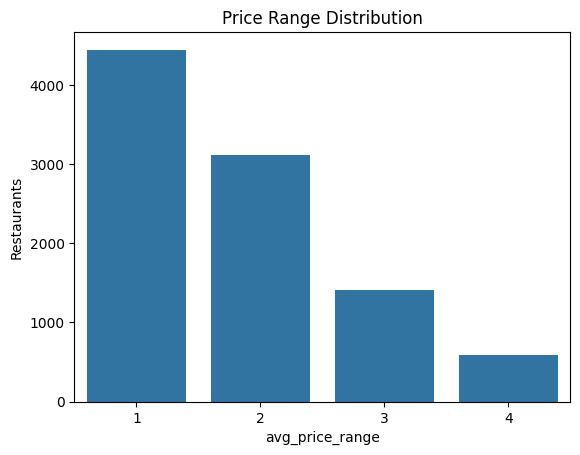

In [2]:
query = """select count(Restaurant_id), Price_range from dataset
group by price_range
order by price_range DESC"""

cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns = ["Restaurants","avg_price_range"])
df
sns.barplot(data = df ,x = "avg_price_range" ,y = "Restaurants").set(title = "Price Range Distribution")
plt.show()

2.Calculate the percentage of restaurants in each price range category.


In [25]:
query = """select Price_range,((count(Restaurant_id)/(select count(Restaurant_id) from dataset))*100) as percentage from dataset
group by price_range
order by price_range """

cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns = ["price_range","percentage"])
df

,price_range,percentage
0,1,46.5292
1,2,32.5934
2,3,14.7419
3,4,6.1355


# Task 4 : Online Delivery
1. Determine the percentage of restaurants that offer online delivery.

In [81]:
query = """ select (((count(Has_Online_delivery))/(select count(Restaurant_id) from dataset))*100) from dataset
where Has_Online_delivery = 'yes'  """

cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data)
df

,0
0,25.6622


2. Compare the average ratings of restaurants with and without online delivery.


In [86]:
query = """ select Has_Online_delivery , avg(Aggregate_rating)from dataset
group by Has_Online_delivery
order by avg(Aggregate_rating)DESC """

cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns = ["Online_delivery","Avg_rating"])
df

,Online_delivery,Avg_rating
0,Yes,3.248837
1,No,2.465296


# LEVEL 2
#TASK 1

1.Analyze the distribution of aggregate ratings and determine the most common rating range.

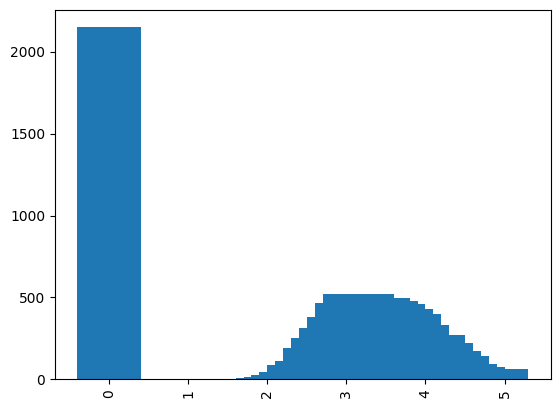

In [34]:
query = """ select Aggregate_rating, count(Restaurant_ID) from dataset
group by Aggregate_rating
order by count(Restaurant_ID) DESC"""

cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data,columns = ["Ratings", "Frequency"])
df
plt.bar(df["Ratings"],df["Frequency"])
plt.xticks(rotation = 90)
plt.show()

2. Calculate the average number of votes received by restaurants

In [36]:
query = """ select avg(Votes) from dataset """

cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data)
df

,0
0,156.9097


# Task 2
1. Identify the most common combinations of cuisines in the dataset

In [43]:
query = """select  Cuisines ,count(Restaurant_ID)  from dataset
            group by Cuisines
            order by count(Restaurant_ID) DESC
            limit 1"""

cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data,columns = ["Cuisine", " frequency "])
df

,Cuisine,frequency
0,North Indian,936


2. Determine if certain cuisine combinations tend to have higher ratings.

In [59]:
query = """select Cuisines , avg(Aggregate_rating) from dataset
            group by Cuisines 
            order by avg(Aggregate_rating) DESC """

cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data,columns = ["Cuisine", " Rating "])
Top_10 = df.head(10)
Top_10

,Cuisine,Rating
0,"European, Asian, Indian",4.9
1,"American, Caribbean, Seafood",4.9
2,"BBQ, Breakfast, Southern",4.9
3,"American, Coffee and Tea",4.9
4,"American, Sandwich, Tea",4.9
5,"American, BBQ, Sandwich",4.9
6,"Burger, Bar Food, Steak",4.9
7,"Hawaiian, Seafood",4.9
8,"Italian, Deli",4.9
9,"European, German",4.9


# Task 3

1. Plot the locations of restaurants on a map using longitude and latitude coordinates.

In [1]:
pip install folium


Note: you may need to restart the kernel to use updated packages.


In [24]:
import folium 
data = pd.read_csv("C:/pawan/python/projects/internship project/dataset.csv")


df = pd.DataFrame(data)

# Create a map centered around the mean latitude and longitude
center_lat = df['Latitude'].mean()
center_lon = df['Longitude'].mean()
map_restaurants = folium.Map(location=[center_lat, center_lon], zoom_start=5)

# Add points to the map
for _, row in df.iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup = row['Restaurant_Name'],
        icon = folium.Icon(color='lightgray', icon='', prefix='fa')
    ).add_to(map_restaurants)

# Display the map
map_restaurants.save("restaurants_map.html")
map_restaurants


KeyError: 'Restaurant_Name'

2.Identify any patterns or clusters of restaurants in specific areas.

In [63]:
from folium.plugins import HeatMap
print("Cluster Heatmap of the Resturant location \n\n")
data = pd.read_csv("C:/pawan/python/projects/internship project/dataset.csv")


df = pd.DataFrame(data)
map = folium.Map(location=[df['Latitude'].mean(), df['Longitude'].mean()], zoom_start=5 )

heat_data = [[row['Latitude'], row['Longitude']] for index, row in data.iterrows()]
HeatMap(heat_data, radius=15).add_to(map)
map.save("restaurants_heatmap.html")
map



Cluster Heatmap of the Resturant location 




# Task 4
1.Identify if there are any restaurant chains present in the dataset.

In [29]:
query = """select  Restaurant_Name ,count(Restaurant_ID)  from dataset
            group by Restaurant_Name
            order by count(Restaurant_ID) DESC
            """

cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data,columns = ["Restaurant_Name", " frequency "])
df.head(10)

,Restaurant_Name,frequency
0,Cafe Coffee Day,83
1,Domino's Pizza,79
2,Subway,63
3,Green Chick Chop,51
4,McDonald's,48
5,Keventers,34
6,Pizza Hut,30
7,Giani,29
8,Baskin Robbins,28
9,Barbeque Nation,26


2.Analyze the ratings and popularity of different restaurant chains.

In [44]:
query = """select  Restaurant_Name , Round(avg(Aggregate_rating),2) as Rating, sum(Votes) as Rating from dataset
            group by Restaurant_Name
            order by Rating DESC
            """

cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data,columns = ["Restaurant_Name","Rating","Votes"])
top_10 = df.head(10)
top_10



,Restaurant_Name,Rating,Votes
0,Talaga Sampireun,4.9,5514
1,Sushi Masa,4.9,605
2,Milse,4.9,754
3,Miann,4.9,281
4,Flat Iron,4.9,309
5,Duck & Waffle,4.9,706
6,Bao,4.9,161
7,Solita,4.9,162
8,Mainland China Restaurant,4.9,182
9,Cube - Tasting Kitchen,4.9,441


# Level 3

# Task 2

1.Identify the restaurants with the highest and lowest number of votes.

In [62]:
data = pd.read_csv("C:/pawan/python/projects/internship project/dataset.csv")
df = pd.DataFrame(data)
Highest_votes = df.sort_values(by = 'Votes', ascending = False )
Restaurant_highest_votes = Highest_votes.iloc[0]
Restaurant_lowest_votes = Highest_votes.iloc[-1]
print(f"Restaurant with Highest Number of votes is {Restaurant_highest_votes}")
print(f"Restaurant with lowest Number of votes is {Restaurant_lowest_votes}")

Restaurant with Highest Number of votes is Restaurant ID                                                       51705
Restaurant Name                                                      Toit
Country Code                                                            1
City                                                            Bangalore
Address                 298, Namma Metro Pillar 62, 100 Feet Road, Ind...
Locality                                                      Indiranagar
Locality Verbose                                   Indiranagar, Bangalore
Longitude                                                       77.640709
Latitude                                                        12.979166
Cuisines                                         Italian, American, Pizza
Average Cost for two                                                 2000
Currency                                               Indian Rupees(Rs.)
Has Table booking                                                    

2. Analyze if there is a correlation between the number of votes and the rating of a restaurant.


In [5]:
data = pd.read_csv("C:/pawan/python/projects/internship project/dataset.csv")
df = pd.DataFrame(data)
Votes = df['Votes']
Rating= df['Aggregate_rating']
correlation_coefficient = Rating.corr(Votes)
print(f'Correlation between Rating and Votes: {correlation_coefficient}')

KeyError: 'Aggregate_rating'

# Task 3

1. Analyze if there is a relationship between the price range and the availability of online delivery and table booking.


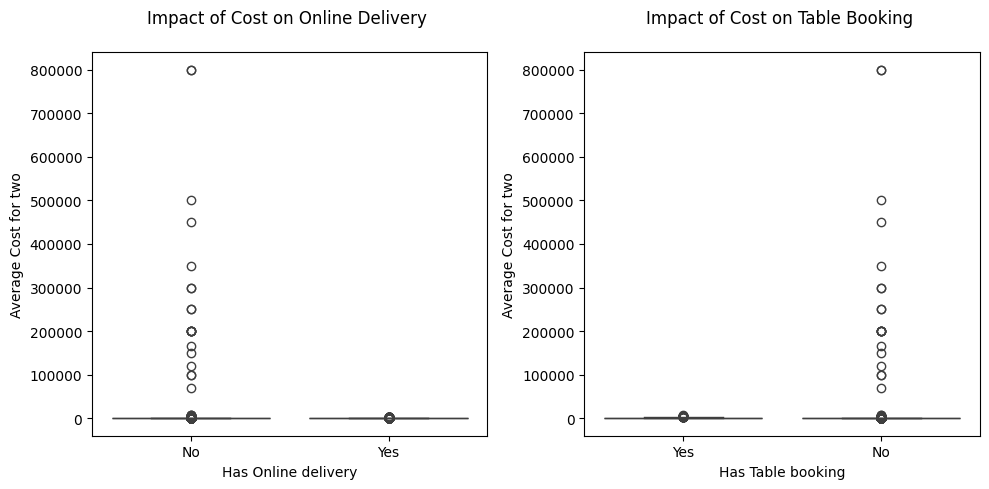

In [90]:
data = pd.read_csv("C:/pawan/python/projects/internship project/dataset.csv")
df = pd.DataFrame(data)

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
sns.boxplot(x='Has Online delivery', y='Average Cost for two', data=df)
plt.xlabel('Has Online delivery')
plt.ylabel('Average Cost for two')
plt.title('Impact of Cost on Online Delivery \n')

plt.subplot(1,2,2)

sns.boxplot(x='Has Table booking', y='Average Cost for two', data=df)
plt.xlabel('Has Table booking')
plt.ylabel('Average Cost for two')
plt.title('Impact of Cost on Table Booking \n')

plt.tight_layout()
plt.show()


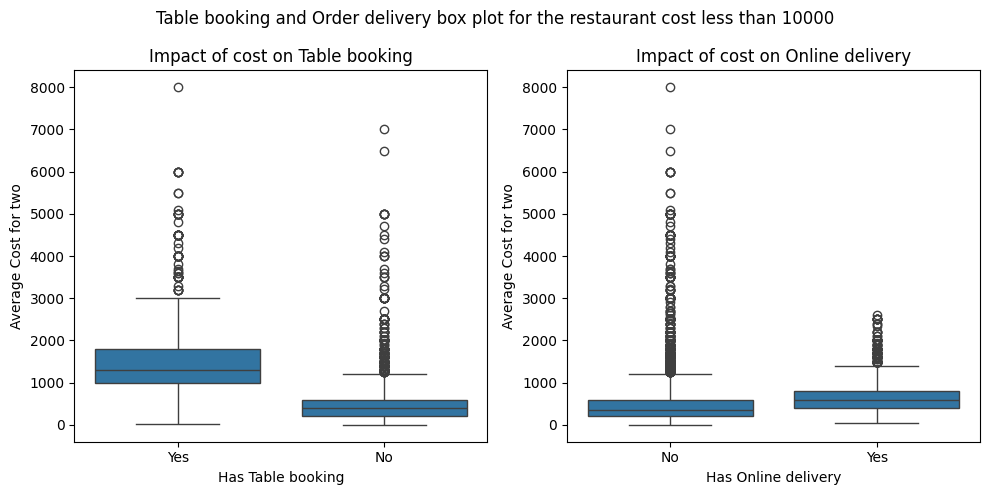

In [91]:
plt.figure(figsize= (10,5))
plt.suptitle('Table booking and Order delivery box plot for the restaurant cost less than 10000')
plt.subplot(1,2,1)
sns.boxplot(x='Has Table booking', y='Average Cost for two', data=data.loc[data['Average Cost for two']<10000 , :] )
plt.title('Impact of cost on Table booking')
plt.subplot(1,2,2)
sns.boxplot(x='Has Online delivery', y='Average Cost for two', data=data.loc[data['Average Cost for two']<10000 , :] )
plt.title('Impact of cost on Online delivery')
plt.tight_layout()
plt.show()